In [1]:
# import sys
# sys.path.insert(0,".")

import prob4_CNN


from __future__ import print_function
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid

# from einops import rearrange, reduce
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import numpy as np

class Args():
    def __init__(self,batch_size, test_batch_size, epochs,lr, momentum, no_cuda, seed, log_interval, save_model):
        self.batch_size=batch_size
        self.test_batch_size=test_batch_size
        self.epochs=epochs
        self.lr=lr
        self.momentum=momentum
        self.no_cuda=no_cuda
        self.seed=seed
        self.log_interval=log_interval
        self.save_model=save_model
        
        
args = Args(
    batch_size=64,
    test_batch_size=1000,
    epochs=5,
    lr=0.01,
    momentum=0.5,
    no_cuda=False,
    seed=1,
    log_interval=10,
    save_model=True
)

use_cuda = not args.no_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")



In [19]:
model = prob4_CNN.CNN().to(device)
model.load_state_dict(torch.load("models/cnn/mnist_cnn_vf.pt"))
model.eval()

CNN(
  (conv1): Conv2d(1, 40, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(40, 80, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1280, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [ ]:

# correct = 0

# pred_=[]
# test_labels=[]

# with torch.no_grad():
#     for data, target in test_loader:
#         data, target = data.to(device), target.to(device)
#         output = model(data)
#         pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
#         test_labels.append(target)
#         pred_.append(pred)
#         correct += pred.eq(target.view_as(pred)).sum().item()

# plt.imshow(data[573][0],cmap="gist_gray")
# plt.bar(x=[0,1,2,3,4,5,6,7,8,9],height=-output[573])
# int(output.argmax(dim=1, keepdim=True)[573])

In [3]:
# # testing - can ignore
pos = []
for i in np.arange(0,28,1):
    pos.append([i,i])

# blank_image = [[0]*28]*28
# print(f"Number of columns, should be 28: {len(blank_image)}")
# print(f"Number of rows, should be 28: {len(blank_image[0])}")
# plt.imshow(blank_image,cmap="gist_gray")
# plt.title(f"Blank Image")

In [4]:
def list_to_28x28_tensor(lst):
    blank_image = [[0]*28]*28
    tens = torch.Tensor(blank_image)
    for i in lst:
        tens[i[0],i[1]] += 1
    return tens

In [5]:
def list_to_prediction(lst, vis1=False,vis2=False,bw=True):
    tens = list_to_28x28_tensor(lst)
    tens_reshaped = tens.reshape((1,28,28))
    fitted = model(tens_reshaped)

    if vis1:
        if bw:
            plt.imshow(tens, cmap = "gist_gray")
        else:
            plt.imshow(tens)
        plt.show()
    if vis2:
        plt.bar(x=[0,1,2,3,4,5,6,7,8,9],height=fitted.reshape(10,).detach().numpy())
        plt.show()

    guess = int(fitted.argmax(dim=1,keepdim=True))
    print(f"Based on our machine learning analytics, we believe this visual to be: {guess}")
    return guess

In [6]:
# _ = list_to_prediction(lst=pos,vis1=True,vis2=True,bw=True)

# TODO
why I am not getting binary results? my visuals look like true heatmaps...whats up?? does his website have dupes or is there a big in MY code?
# answer
his code has dupes, so I need to decide whether I like the depth or whether I want to change mine from += 1 to = 1

In [8]:
# # https://sharkyweb-dotcom.github.io/pixel-nums/
# basic_one_attempt = [
#     [5,11],[7,11],[8,11],[9,11],[7,12],[8,12],[13,12],[12,12],[11,12],[10,13],[9,13],[7,13],[6,14],[6,13],[5,13],[4,13],[4,12],[5,12],[6,12],[7,12],[8,12],[9,12],[10,12],[12,12],[13,12],[14,12],[15,12],[16,12],[17,12],[18,12],[19,12],[20,12],[21,12],[22,12],[20,12],[19,13],[18,13],[17,13],[16,13],[15,13],[14,13],[13,13],[12,13],[11,13],[10,13],[8,14],[7,14],[7,13],[8,13],[8,12],[9,12],[9,13],[8,13],[8,14],[9,14],[10,14],[11,14],[12,14],[13,14],[14,14],[15,14],[16,14],[17,14],[18,14],[19,14],[20,14],[21,14],[22,14],[22,13],[21,13],[21,12],[20,12],[19,12],[20,12],[20,13],[19,13],[18,13],[18,12],[17,12],[16,12],[15,11],[14,11],[13,11],[12,11],[11,11],[10,11],[9,11],[8,11],[7,11],[6,11],[5,11],[4,11],[3,11],[3,12],[3,13],[4,13],[4,14],[5,14],[4,14],[3,14],[4,14],[5,14],[5,15],[6,15],[7,15],[8,15],[9,15],[10,15],[11,15],[12,15],[13,14],[14,14],[15,14],[16,14],[17,14],[18,14],[19,14],[20,14],[21,14],[22,14],[21,14],[21,13],[20,13],[19,12],[18,12],[17,12],[17,11],[16,11],[16,12],[15,12],[16,11],[17,11],[18,11],[19,11],[20,11],[20,12],[21,12],[21,13],[21,14],[21,15],[20,15],[19,15],[18,15],[17,15],[16,15],[15,15],[14,15],[13,15],[12,15],[11,15],[11,14],[10,14]
# ]

In [29]:
basic_one_attempt = [
    [6,11],[7,10],[7,9],[8,9],[9,9],[10,9],[11,9],[11,8],[12,8],[13,8],[14,8],[15,8],[16,8],[17,9],[18,9],[18,10],[19,11],[19,12],[20,12],[20,13],[19,14],[19,15],[19,16],[19,17],[18,19],[18,20],[17,20],[17,21],[16,21],[16,22],[14,22],[14,23],[13,23],[12,23],[12,22],[11,22],[10,21],[9,22],[8,22],[7,22],[7,21],[6,20],[5,19],[5,18],[4,18],[3,17],[3,16],[3,15],[3,14],[4,13],[5,13],[5,12],[6,12],[7,12],[7,11],[8,10],[9,10],[10,10],[11,10],[12,10],[12,9],[13,9],[14,9],[15,9],[16,9],[16,8],[17,8],[18,8],[19,8],[19,9],[19,10],[20,10],[20,11],[20,12],[20,13],[20,14],[20,15],[20,16],[20,17],[19,17],[19,18],[18,18],[18,19],[18,20],[17,20],[17,21],[16,21],[16,22],[15,22],[14,22],[13,22],[12,22],[11,22],[10,22],[9,22],[8,23],[8,22],[7,22],[7,21],[6,21],[5,20],[4,20],[4,19],[3,19],[3,18],[3,17],[3,16],[4,15],[4,14],[4,15],[4,16],[4,17],
]

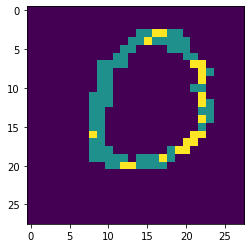

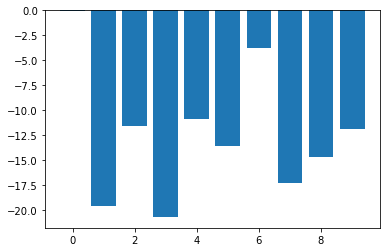

Based on our machine learning analytics, we believe this visual to be: 0


In [33]:
_ = list_to_prediction(lst=basic_one_attempt,vis1=True,vis2=True,bw=False)

In [27]:
three = [
    [8,6],[7,7],[6,7],[6,8],[5,8],[5,9],[5,10],[4,12],[4,13],[4,14],[4,15],[4,16],[4,17],[5,17],[5,18],[6,18],[7,18],[8,18],[9,18],[10,17],[11,16],[11,15],[12,14],[13,13],[13,12],[13,11],[13,10],[12,11],[12,12],[12,13],[12,14],[12,15],[13,16],[13,17],[14,17],[14,18],[15,18],[16,18],[17,18],[18,18],[19,18],[20,18],[20,17],[21,17],[21,16],[22,15],[23,14],[23,13],[23,12],[23,11],[23,10],[23,9],[23,8],[23,7],[22,7],[21,7],[21,8],[21,9],[21,10],[21,11],[22,11],[22,12],[22,13],[22,12],[22,11],[22,10],[22,9],[22,8],[21,8],[21,9],[21,10],[21,11],[21,12],[21,13],[21,14],[21,15],[20,16],[20,17],[19,17],[18,17],[17,17],[16,17],[15,17],[14,17],[14,16],[13,16],[13,15],[12,15],[12,14],[12,13],[12,12],[12,11],[12,12],[12,13],[11,13],[11,14],[11,15],[10,15],[10,16],[9,16],[9,17],[8,17],[8,18],[7,18],[7,17],[6,17],[4,17],[5,17],[5,16],[5,15],[5,14],[4,14],[4,13],[4,12],[5,12],[5,11],[5,10],[4,10],[4,11],[3,11],[3,12],[3,13],[3,12],[3,11],[4,11],[4,10],[4,9],[5,9],[5,8],[6,8],[5,8],[5,7],[6,7],[7,7],[7,6],[8,6],[7,6],[7,7],[6,7],[5,8],[5,9],[5,10],
]

In [31]:
_ = list_to_prediction(lst=three,vis1=True,vis2=True,bw=False)

NameError: name 'three' is not defined

In [21]:
eight = [
    [6,16],[6,15],[5,15],[5,14],[4,14],[4,13],[4,12],[4,11],[4,10],[4,9],[5,9],[5,8],[6,8],[7,8],[7,7],[8,7],[9,7],[9,8],[10,8],[10,10],[10,11],[11,11],[11,12],[12,13],[12,14],[13,15],[14,16],[14,17],[15,17],[16,18],[17,18],[18,18],[19,18],[20,18],[20,17],[21,17],[22,16],[22,15],[23,15],[23,14],[23,13],[23,12],[23,11],[23,10],[23,9],[22,9],[22,8],[21,8],[21,7],[20,7],[19,7],[18,7],[17,7],[17,8],[16,8],[15,8],[15,9],[15,10],[14,10],[14,11],[13,11],[13,12],[12,12],[12,13],[11,13],[11,14],[10,14],[10,15],[9,16],[9,17],[8,17],[7,17],[6,17],[5,17],[5,16],[4,16],[4,15],[3,14],[3,13],[3,12],[3,11],[3,10],[4,9],[4,8],[5,8],[6,8],[6,7],[7,7],[7,8],[8,8],[9,8],[9,9],[10,9],[10,10],[10,11],[11,12],[11,13],[12,13],[12,14],[13,14],[13,15],[14,15],[14,16],[15,17],[15,18],[16,18],[16,19],[17,19],[18,19],[18,18],[19,18],[20,17],[20,16],[21,16],[22,15],[22,14],[22,13],[4,8],[4,7],[5,7],[6,7],[7,7],[8,7],[9,7],[10,7],[10,8],[10,9],[11,9],[11,10],[12,10],[12,11],[12,12],[13,12],[13,13],[13,14],[13,15],[14,15],[14,14],[14,13],[13,12],[13,11],[13,10],[12,11],[12,12],[13,12],[12,12],[12,11],[12,10],[11,10],[11,9],[11,8],[10,8],[11,8],[11,9],[12,9],[12,10],[13,10],[14,11],[14,10],[15,9],[16,8],[16,7],[17,7],[16,7],[15,7],[14,8],[14,9],[13,9],[14,9],[15,8],[17,7],[18,7],[19,7],[20,7],[19,8],[18,8],[17,9],[17,8],[18,8],[19,8],[20,8],[20,9],[21,9],
]

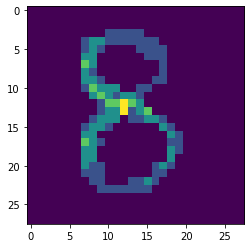

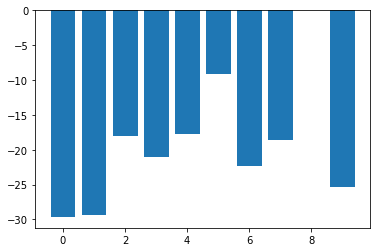

Based on our machine learning analytics, we believe this visual to be: 8


In [32]:
_ = list_to_prediction(lst=eight,vis1=True,vis2=True,bw=False)

In [24]:
seven = [
    [8,7],[8,6],[7,6],[6,6],[5,6],[5,5],[4,5],[3,5],[3,6],[3,7],[4,7],[4,8],[4,9],[4,10],[4,11],[4,12],[4,13],[4,14],[4,15],[4,16],[4,17],[4,18],[4,19],[3,19],[3,20],[3,21],[3,22],[4,22],[5,22],[6,21],[7,21],[8,20],[9,19],[10,17],[11,17],[12,16],[13,15],[14,14],[15,13],[16,13],[16,12],[17,11],[19,10],[19,9],[20,9],[21,8],[22,8],[22,7],[23,7],[23,8],[22,8],[22,9],[21,9],[21,10],[20,10],[20,11],[19,11],[19,12],[18,12],[18,13],[17,13],[17,14],[16,14],[15,15],[14,15],[14,16],[13,16],[12,17],[11,17],[11,18],[10,18],[10,19],[9,19],[9,20],[8,20],[8,21],[7,21],[6,22],[7,21],[8,21],[8,20],[9,20],[9,19],[10,18],[11,17],[12,17],[13,16],[14,15],[15,15],[15,14],[16,14],[17,13],[17,12],[18,12],[18,11],[18,10],[19,10],[18,10],[18,11],[17,11],[16,12],[15,13],[14,13],[14,14],[13,15],[12,16],[11,16],[11,17],[10,17],[10,18],[9,18],[9,19],[9,20],[8,20],[8,21],[7,21],[7,22],[6,22],[5,22],[4,22],[4,21],[4,20],[4,21],[5,21],[6,21],[6,20],[6,19],[5,19],[5,18],[5,17],[5,18],[5,19],[5,20],[5,21],[5,20],[5,19],[5,18],[5,17],[5,16],[5,15],[5,14],[5,13],[5,12],[5,11],[5,10],[5,9],[5,8],[5,7],[5,6],[4,6],[5,6],[6,6],[6,7],[6,8],[6,9],[6,10],[6,11],[6,12],[6,13],[6,14],[6,15],[6,17],[6,18],[6,19],[6,20],[7,22],[8,22],[9,22],[9,21],[10,21],[10,20],[11,19],[11,18],[12,18],[12,17],[13,17],[13,16],[14,16],[15,16],[15,15],[16,15],[16,14],[17,14],[17,13],[18,13],[18,12],[19,12],[19,11],[20,11],[21,11],[21,10],[22,10],[22,9],[23,9]
]

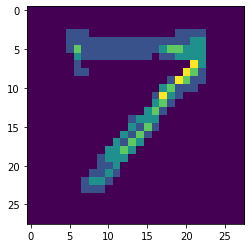

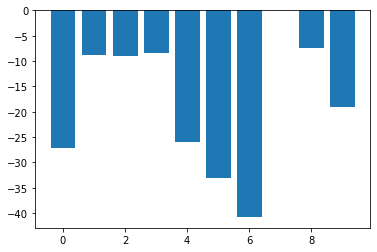

Based on our machine learning analytics, we believe this visual to be: 7


In [26]:
_ = list_to_prediction(lst=seven,vis1=True,vis2=True,bw=False)

In [27]:
one = [
    [4,12],[5,12],[6,12],[7,12],[8,12],[9,12],[10,12],[11,12],[12,12],[13,12],[14,12],[15,12],[16,12],[17,12],[18,12],[19,12],[20,12],[21,12],[22,12],[23,12],[22,12],[21,12],[21,13],[20,13],[19,13],[18,13],[17,13],[16,13],[15,13],[14,13],[13,13],[12,13],[11,13],[10,13],[9,13],[8,13],[7,13],[6,13],[5,13],[4,13],[4,14],[5,14],[6,14],[6,13],[7,13],[8,13],[9,13],[10,13],[11,13],[13,13],[14,13],[15,13],[16,13],[17,13],[17,14],[18,14],[19,14],[20,14],[21,14],[22,14],[23,13],[22,13],[21,13],[21,14],[21,15],[20,15],[19,15],[18,15],[17,15],[16,16],[15,16],[14,16],[13,16],[12,16],[11,15],[10,15],[9,15],[8,15],[7,15],[6,15],[5,15],[5,14],[6,14],[7,14],[8,14],[9,14],[10,14],[11,14],[12,14],[13,14],[14,14],[15,14],[16,14],[17,14],[18,14],
]

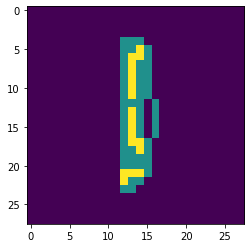

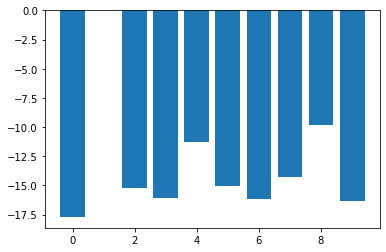

Based on our machine learning analytics, we believe this visual to be: 1


In [28]:
_ = list_to_prediction(lst=one,vis1=True,vis2=True,bw=False)

In [12]:
from torch import nn
import torch.nn.functional as F
import torch

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 40, 5, 1)
        self.conv2 = nn.Conv2d(40, 80, 5, 1)
        self.fc1 = nn.Linear(4*4*80, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1,4*4*80)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return F.softmax(x, dim=1)

In [5]:
# import prob4_CNN
# model = prob4_CNN.CNN()

In [14]:
# model = prob4_CNN.CNN() #.to(device)
model = CNN()
model.load_state_dict(torch.load("models/cnn/mnist_cnn_vf.pt"))

<All keys matched successfully>

In [15]:
gmodel.eval()
dummy_input = torch.zeros(1,1,28,28)
torch.onnx.export(model,dummy_input,'onnx_model_inference.onnx',verbose=True)